In [13]:
import os 
import re
import ast
import anndata as ad 
import numpy as np 
import pandas as pd
import scanpy as sc
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
integrated_adata = ad.read_h5ad('/sbgenomics/project-files/tangram_integration/HTAPP-313-SMP-932_fresh_channel1_ad_ge.h5ad')
merfish_adata = ad.read_h5ad('/sbgenomics/project-files/HTAPP-313_centroids_celltyped.h5ad')

In [35]:
integrated_adata

AnnData object with n_obs × n_vars = 11441 × 22738
    obs: 'z_height', 'x_boundary', 'y_boundary', 'x_centroid', 'y_centroid', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'overlap_genes', 'rank_genes_groups', 'training_genes'

In [36]:
merfish_adata

AnnData object with n_obs × n_vars = 11441 × 291
    obs: 'z_height', 'x_boundary', 'y_boundary', 'x_centroid', 'y_centroid', 'n_genes_by_counts', 'total_counts', 'leiden', 'cell_type'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_cell_type', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [37]:
integrated_adata.obs['cell_type'] = list(merfish_adata.obs['cell_type'])

In [40]:
integrated_adata.obs.columns

Index(['z_height', 'x_boundary', 'y_boundary', 'x_centroid', 'y_centroid',
       'uniform_density', 'rna_count_based_density', 'cell_type'],
      dtype='object')

         Falling back to preprocessing with `sc.pp.pca` and default params.


/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


categories: Activated Fibroblast, B cell, Endothelial, etc.
var_group_labels: MBC, B cell, Endothelial, etc.


/opt/conda/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


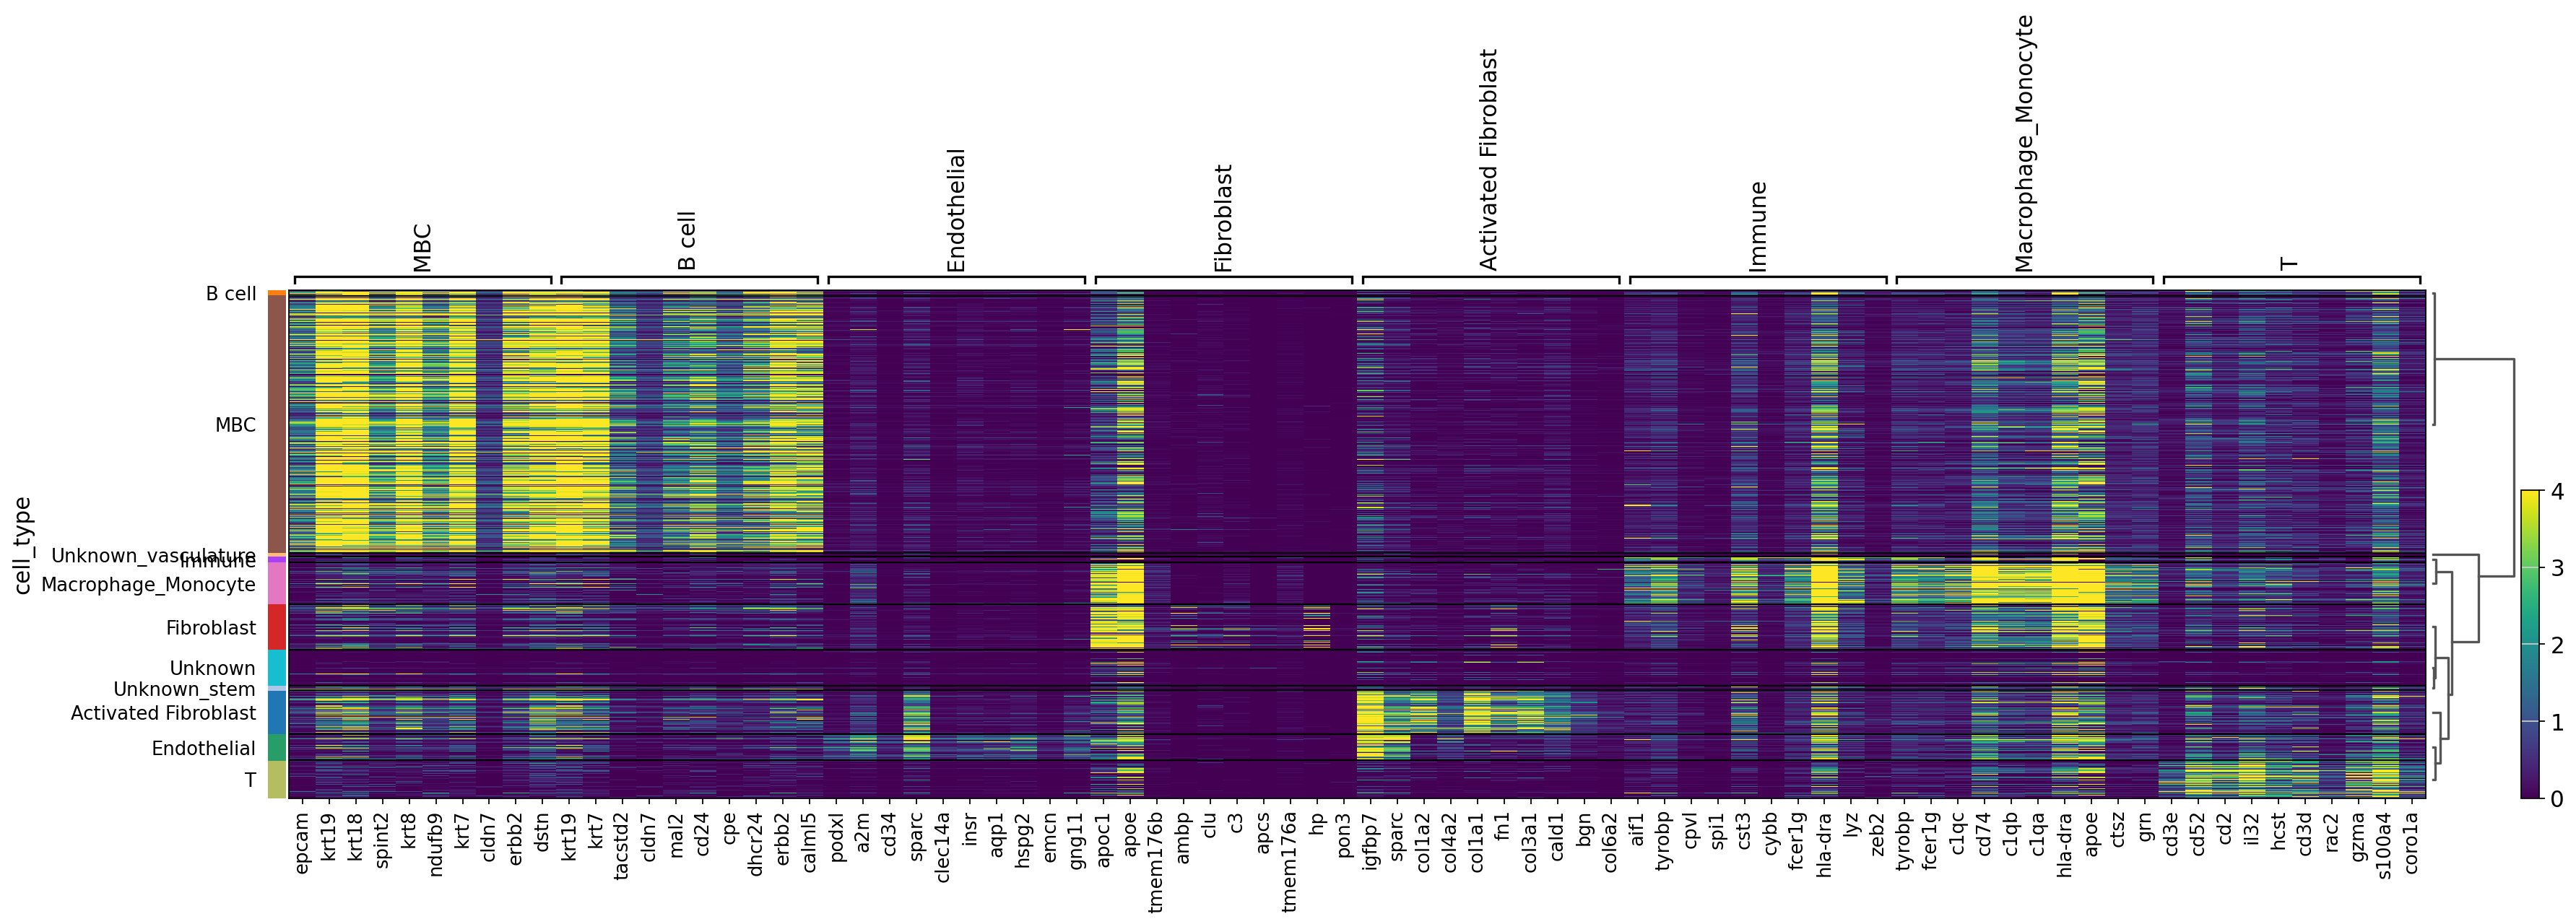

In [41]:
sc.set_figure_params(dpi_save = 300)
sc.tl.rank_genes_groups(integrated_adata, "cell_type", method="t-test")
sc.pl.rank_genes_groups_heatmap(integrated_adata, 
                                groups=['MBC','B cell','Endothelial','Fibroblast',
                                        'Activated Fibroblast','Immune','Macrophage_Monocyte','T'], 
                                n_genes=10, groupby="cell_type", show_gene_labels=True,vmax = 4)

categories: Activated Fibroblast, B cell, Endothelial, etc.
var_group_labels: T


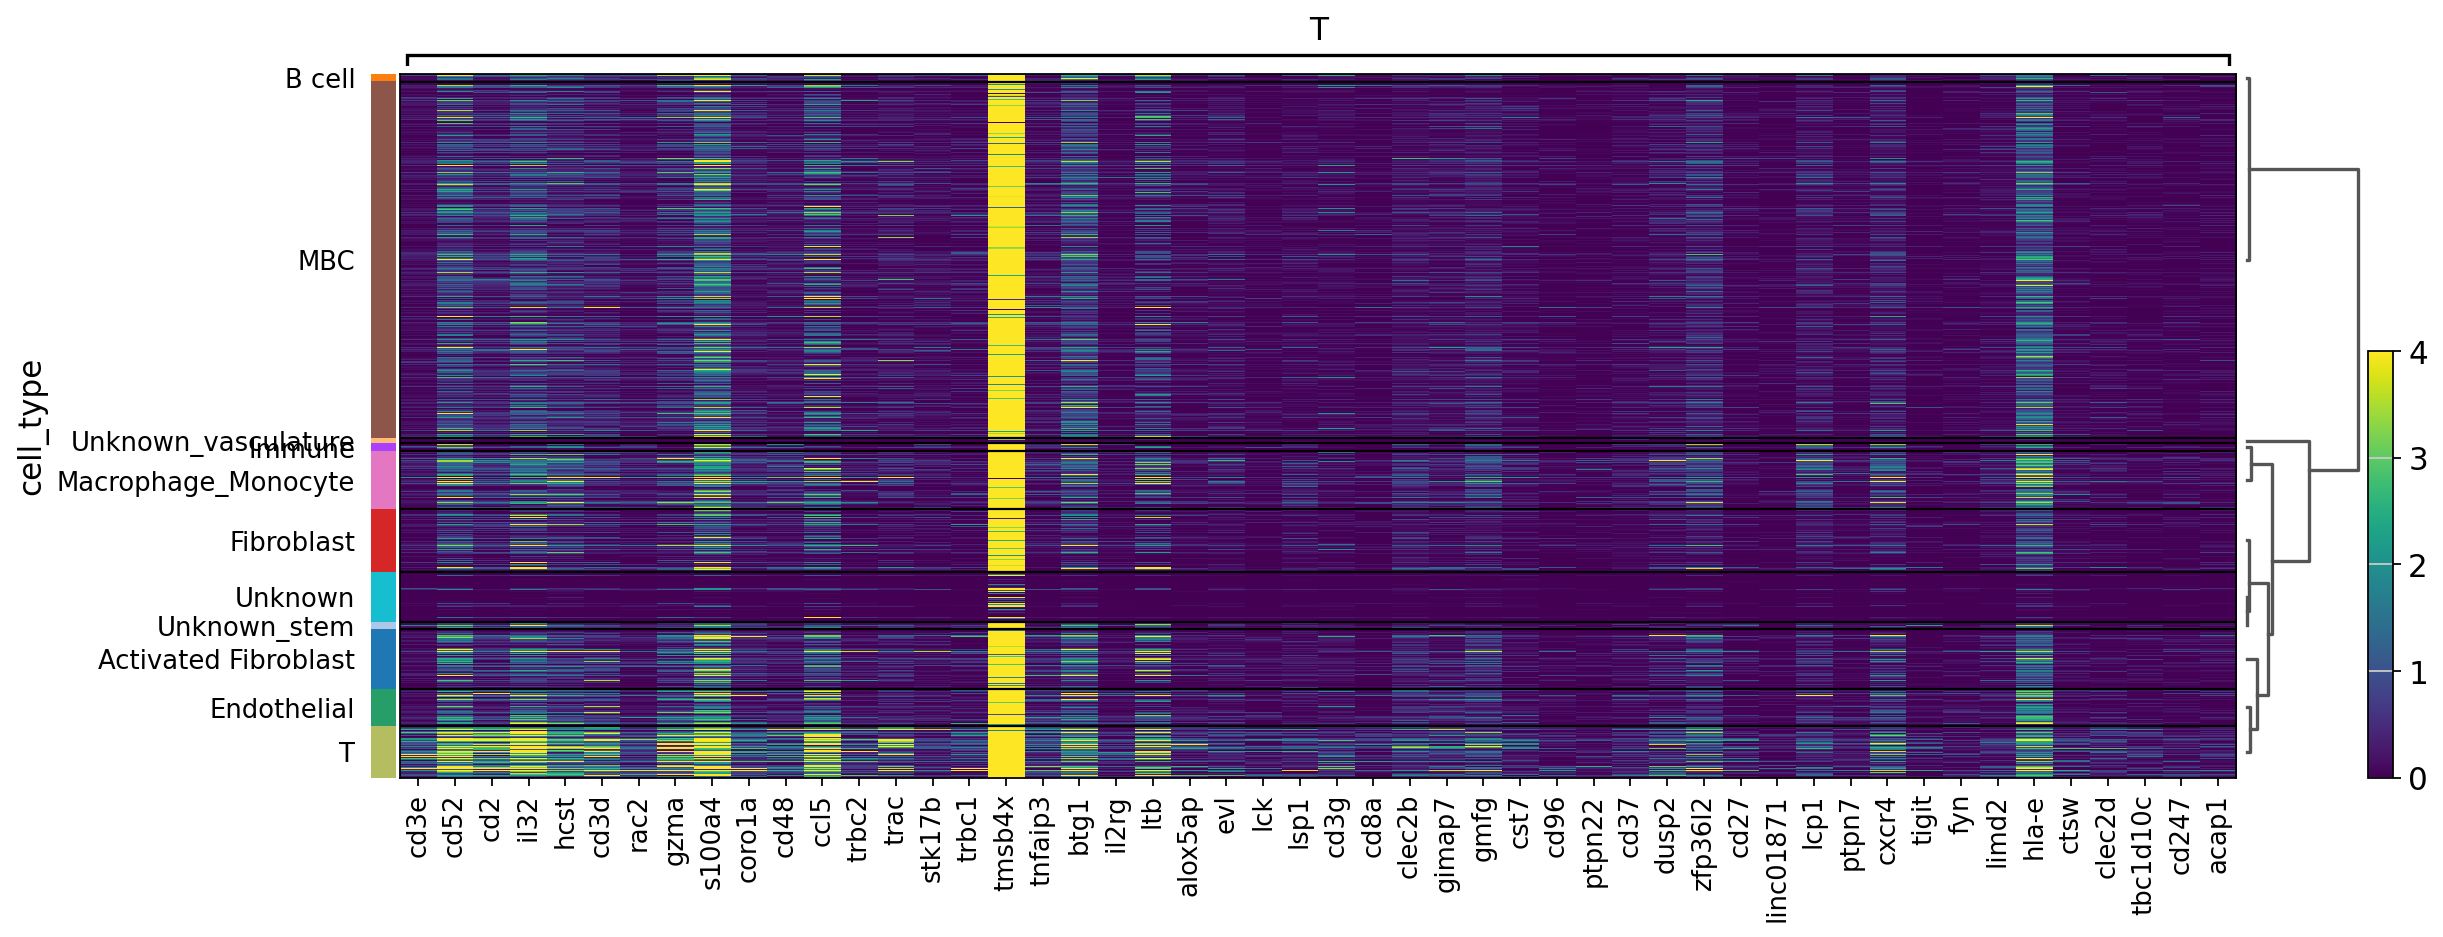

In [42]:
sc.tl.rank_genes_groups(integrated_adata, "cell_type", method="t-test")
sc.pl.rank_genes_groups_heatmap(integrated_adata, 
                                groups=['T'], 
                                n_genes=50, groupby="cell_type", show_gene_labels=True,vmax = 4)

In [46]:
[print(x) for x in merfish_adata.var_names]

ACTA2
ACTG2
ACTR3B
ADGRL4
AGR2
AHR
AIF1
AKT1
ALDH1A3
ANLN
AP1M2
APOC1
APOE
AR
AURKA
AZGP1
B2M
BAG1
BANK1
BCL2
BGN
BICC1
BIRC5
BLVRA
BRAF
C1QA
C1QB
CALCRL
CAPN13
CCL2
CCL3
CCL4
CCL5
CCNB1
CCND1
CCNE1
CCNE2
CD14
CD163
CD19
CD2
CD24
CD274
CD34
CD36
CD38
CD3D
CD3E
CD3G
CD4
CD40
CD40LG
CD44
CD5
CD63
CD68
CD69
CD7
CD74
CD79A
CD79B
CD8A
CD9
CD96
CDC20
CDC6
CDH1
CDH11
CDH3
CDK4
CDK6
CDK7
CDKN2A
CEACAM1
CENPF
CEP55
CLDN4
CLU
COBL
COL1A1
COL1A2
COL3A1
COL4A1
COL4A2
COL4A5
CR2
CRABP2
CSRP2
CST3
CSTB
CTCF
CTLA4
CTSL
CXCR5
CXXC5
DCN
DERL3
EFNA5
EGFR
EIF3E
ELF5
EPCAM
ERBB2
ERBB3
ERBB4
ESR1
FABP7
FAP
FASN
FAT1
FCGR3A
FCN1
FCRL5
FGFR1
FGFR2
FGFR4
FN1
FOS
FOXA1
FOXC1
FOXP3
FXYD3
GATA3
GNG11
GNLY
GPNMB
GPR160
GRB7
GSN
GZMB
HIF1A
HLA-A
HLA-B
HLA-C
HLA-DPA1
HLA-DRA
HLA-DRB1
HLA-DRB5
HLA-E
HSPB1
HSPG2
ICAM1
ICOS
IFITM3
IGF1R
IGFBP5
IL2RA
IL32
IL3RA
IL7R
ISG15
ISG20
ITGA6
ITGAX
JUN
JUNB
KIF23
KIT
KRAS
KRT10
KRT14
KRT15
KRT17
KRT18
KRT19
KRT5
KRT7
KRT8
LAG3
LAMA1
LAMC1
LDB2
LGALS1
LGALS2
LGMN
LILRB1
LRP2
LST

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [29]:
df = pd.DataFrame(adata.X, columns = adata.var_names)

In [17]:
adata.obsm['spatial'] = adata.obs[['x_centroid','y_centroid']]

In [18]:
adata.obsm

AxisArrays with keys: spatial

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 15000.0)

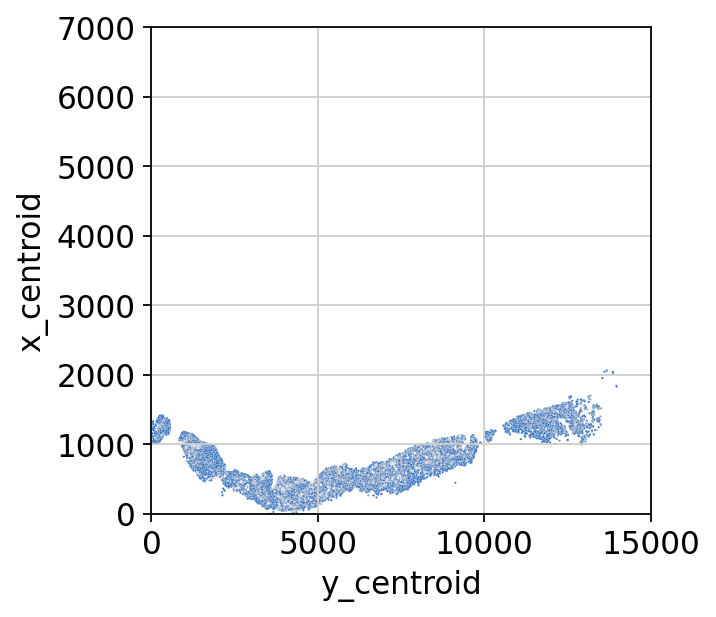

In [52]:
fig,ax=plt.subplots()
sns.scatterplot(y = adata.obs.x_centroid, x = adata.obs.y_centroid, 
                c = np.log1p(df['cd48']),s = 1, ax = ax, cmap = 'vlag')
ax.set_ylim(0,7000)
ax.set_xlim(0,15000)